# Load libraries 

In [1]:
#load libraries 
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np, math, pylab
#import ROOT
#from ROOT import TFile

import root_pandas
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)


Welcome to JupyROOT 6.23/01


# Load tuple files
The following will automatically download the files from https://userweb.jlab.org/~spaul/sidis_tuple_examples, if they are not already downloaded.  

In [3]:
import urllib.request, os

for filename in "example_mc.root", "example_data.root":
    if not (filename in os.listdir(".")):
        url = 'https://userweb.jlab.org/~spaul/sidis_tuples_examples/' +filename
        urllib.request.urlretrieve(url, filename)
        print("downloaded file from " + url)
    else:
        print("found file: " + filename + ",\t no need to re-download")
print("done downloading files")

downloaded file from https://userweb.jlab.org/~spaul/sidis_tuples_examples/example_mc.root
downloaded file from https://userweb.jlab.org/~spaul/sidis_tuples_examples/example_data.root
done downloading files


Now load the tuples from the files.

In [4]:
#electrons: events with at least one electron which passes DIS event selection cuts
#hadrons: events with at least one electron (passing cuts above) and at least one charged hadron
#dihadrons: events with at least one electron and two charged hadrons, one of which is a "leading" pion, (ie, z>0.5)

data_electrons = root_pandas.read_root("example_data.root", "electrons")
data_hadrons = root_pandas.read_root("example_data.root", "hadrons")
data_dihadrons = root_pandas.read_root("example_data.root", "dihadrons")

#same for Monte-Carlo simulations
mc_electrons = root_pandas.read_root("example_mc.root", "electrons")
mc_hadrons = root_pandas.read_root("example_mc.root", "hadrons")
mc_dihadrons = root_pandas.read_root("example_mc.root", "dihadrons")

In [5]:
#print the number of entries in each tuple
print("data electrons\tlength =", len(data_electrons))
print("data hadrons\tlength =", len(data_hadrons))
print("data dihadrons\tlength =", len(data_dihadrons))
print("")
print("mc electrons\tlength =", len(mc_electrons))
print("mc hadrons\tlength =", len(mc_hadrons))
print("mc dihadrons\tlength =", len(mc_dihadrons))

data electrons	length = 502742
data hadrons	length = 298031
data dihadrons	length = 5877

mc electrons	length = 218458
mc hadrons	length = 322570
mc dihadrons	length = 981


In [6]:
#print the list of variables in each tuple (these are the same for data and monte-carlo)
for df, name in (data_electrons,"electrons"), (data_hadrons,"hadrons"), (data_dihadrons,"dihadrons"):
    print(name + ":")
    print(df.columns)
    print("\n")


electrons:
Index(['E', 'helicity', 'e_p', 'e_th', 'e_ph', 'nelectrons', 'nu', 'Q2', 'x',
       'y', 'W', 'e_DC1x', 'e_DC2x', 'e_DC3x', 'e_DC1y', 'e_DC2y', 'e_DC3y',
       'e_PCALx', 'e_PCALy', 'e_ecalfrac', 'e_pcal', 'e_vz', 'npip', 'npim',
       'npp', 'npm', 'nKp', 'nKm', 'nh', 'z_tot'],
      dtype='object')


hadrons:
Index(['nelectrons', 'E', 'helicity', 'e_p', 'e_th', 'e_ph', 'nu', 'Q2', 'x',
       'y', 'W', 'h_chi2pid', 'h_pid', 'h_p', 'h_th', 'h_ph', 'h_DC1x',
       'h_DC1y', 'h_DC2x', 'h_DC2y', 'h_DC3x', 'h_DC3y', 'dvz', 'z', 'h_cm_p',
       'h_cm_th', 'h_cm_ph', 'h_cm_eta', 'h_cm_pt', 'h_eta', 'dtime',
       'dtime_corr'],
      dtype='object')


dihadrons:
Index(['E', 'helicity', 'e_p', 'e_th', 'e_ph', 'nu', 'Q2', 'x', 'y', 'W',
       'h1_chi2pid', 'h2_chi2pid', 'h1_pid', 'h2_pid', 'h1_p', 'h2_p', 'h1_th',
       'h2_th', 'h1_ph', 'h2_ph', 'h1_z', 'h2_z', 'h1_eta', 'h2_eta',
       'h1_cm_p', 'h2_cm_p', 'h1_cm_th', 'h2_cm_th', 'h1_cm_ph', 'h2_cm_ph',
       'h1_cm_et

In [17]:
def binspace(df, query, min, max, nbins):
    ls = np.linspace(min,max,nbins)
    return [df.query("%s> %s and %s < %s" %(query, mn, query, mx)) for mn,mx in zip(ls[:-1],ls[1:])]

# Plots for the electrons tuple

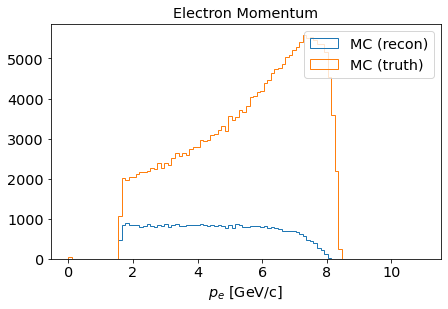

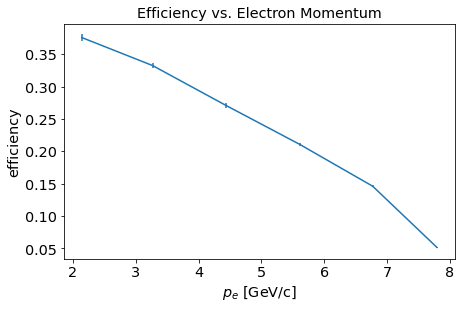

In [34]:
# plot momenta of measured and simulated electrons
# (e_p is an abbreviation for "electron momentum")
plt.hist(mc_electrons.query("e_p>0").e_p,bins=100, range=(0,11),histtype='step',label="MC (recon)")
plt.hist(mc_electrons.e_truth_p,bins=100, range=(0,11),histtype='step',label="MC (truth)")
plt.gca().set_xlabel("$p_{e}$ [GeV/c]")
plt.gca().set_title("Electron Momentum")
plt.gca().legend()
plt.show()

x = []
y = []
dy = []
for bin in binspace(mc_electrons, "e_truth_p", 1.5,8.5,7):
    n_recon = len(bin.query("e_p>0"))
    n_gen = len(bin)
    x.append(np.mean(bin.e_truth_p))
    if n_gen != 0:
        y.append(n_recon/n_gen)
        dy.append(n_recon/n_gen*np.sqrt(1/(n_recon+1)+1/(n_gen+1)))
    else :
        y.append(0)
        dy.append(1)
    
plt.errorbar(x,y,dy)
    
plt.gca().set_xlabel("$p_{e}$ [GeV/c]")
plt.gca().set_ylabel("efficiency")
plt.gca().set_title("Efficiency vs. Electron Momentum")
plt.show()

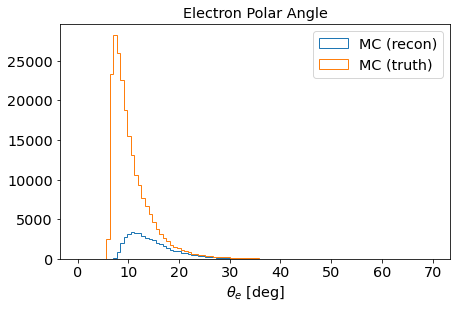

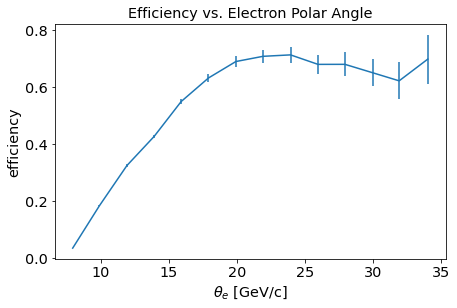

In [55]:
plt.hist(mc_electrons.query("e_p>0").e_th*180/np.pi,bins=100, range=(0,70),histtype='step',label="MC (recon)")
plt.hist(mc_electrons.e_truth_th*180/np.pi,bins=100, range=(0,70),histtype='step',label="MC (truth)")
plt.gca().set_xlabel("$\\theta_{e}$ [deg]")
plt.gca().set_title("Electron Polar Angle")
plt.gca().legend()
plt.show()

x = []
y = []
dy = []
for bin in binspace(mc_electrons, "e_truth_th*180/3.14159", 7,35,15):
    n_recon = len(bin.query("e_p>0"))
    n_gen = len(bin)
    x.append(np.mean(bin.e_truth_th*180/3.14159))
    if n_gen != 0:
        y.append(n_recon/n_gen)
    else :
        y.append(0)
    dy.append(n_recon/n_gen*np.sqrt(1/max(n_recon,1)+1/max(n_gen,1)))
plt.errorbar(x,y,dy)
    
plt.gca().set_xlabel("$\\theta_{e}$ [GeV/c]")
plt.gca().set_ylabel("efficiency")
plt.gca().set_title("Efficiency vs. Electron Polar Angle")
plt.show()

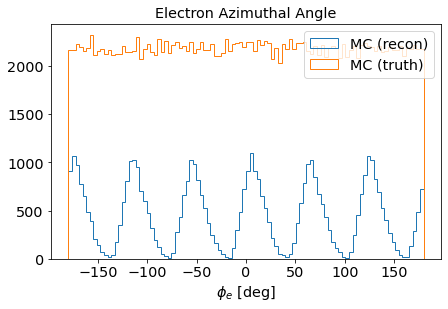

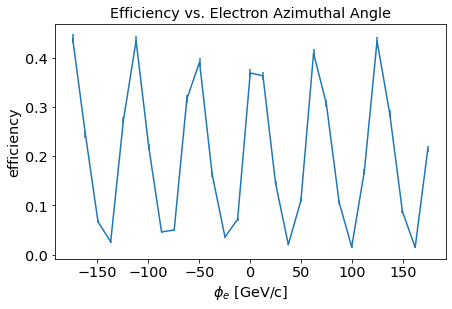

In [54]:
plt.hist(mc_electrons.query("e_p>0").e_ph*180/np.pi,bins=100, range=(-180,180),histtype='step',label="MC (recon)")
plt.hist(mc_electrons.e_truth_ph*180/np.pi,bins=100, range=(-180,180),histtype='step',label="MC (truth)")
plt.gca().set_xlabel("$\\phi_{e}$ [deg]")
plt.gca().set_title("Electron Azimuthal Angle")
plt.gca().legend()
plt.show()

x = []
y = []
dy = []
for bin in binspace(mc_electrons, "e_truth_ph*180/3.14159", -180,180,30):
    n_recon = len(bin.query("e_p>0"))
    n_gen = len(bin)
    x.append(np.mean(bin.e_truth_ph*180/3.14159))
    if n_gen != 0:
        y.append(n_recon/n_gen)
    else :
        y.append(0)
    dy.append(n_recon/n_gen*np.sqrt(1/max(n_recon,1)+1/max(n_gen,1)))
plt.errorbar(x,y,dy)
    
plt.gca().set_xlabel("$\\phi_{e}$ [GeV/c]")
plt.gca().set_ylabel("efficiency")
plt.gca().set_title("Efficiency vs. Electron Azimuthal Angle")
plt.show()

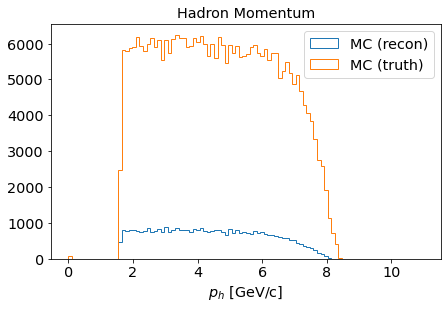

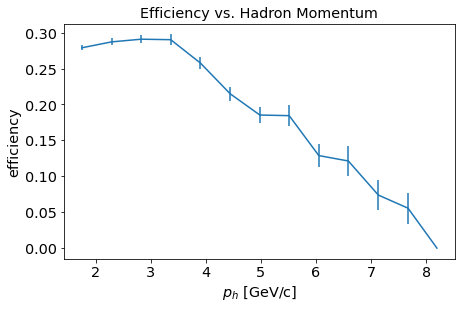

In [49]:

plt.hist(mc_hadrons.query("h_p>0").e_p,bins=100, range=(0,11),histtype='step',label="MC (recon)")
plt.hist(mc_hadrons.e_truth_p,bins=100, range=(0,11),histtype='step',label="MC (truth)")
plt.gca().set_xlabel("$p_{h}$ [GeV/c]")
plt.gca().set_title("Hadron Momentum")
plt.gca().legend()
plt.show()

x = []
y = []
dy = []
for bin in binspace(mc_hadrons, "h_truth_p", 1.5,8.5,14):
    n_recon = len(bin.query("h_p>0"))
    n_gen = len(bin)
    x.append(np.mean(bin.h_truth_p))
    if n_gen != 0:
        y.append(n_recon/n_gen)
        dy.append(n_recon/n_gen*np.sqrt(1/(n_recon+1)+1/(n_gen+1)))
    else :
        y.append(0)
        dy.append(1)
    
plt.errorbar(x,y,dy)
    
plt.gca().set_xlabel("$p_{h}$ [GeV/c]")
plt.gca().set_ylabel("efficiency")
plt.gca().set_title("Efficiency vs. Hadron Momentum")
plt.show()

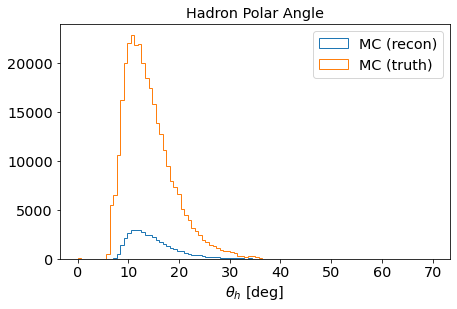

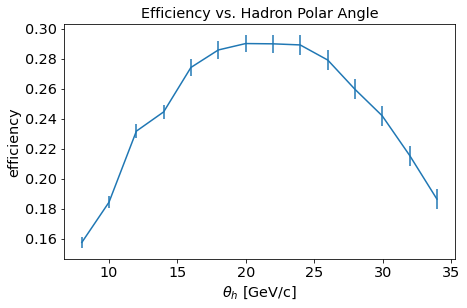

In [53]:
plt.hist(mc_hadrons.query("h_p>0").e_th*180/np.pi,bins=100, range=(0,70),histtype='step',label="MC (recon)")
plt.hist(mc_hadrons.e_truth_th*180/np.pi,bins=100, range=(0,70),histtype='step',label="MC (truth)")
plt.gca().set_xlabel("$\\theta_{h}$ [deg]")
plt.gca().set_title("Hadron Polar Angle")
plt.gca().legend()
plt.show()

x = []
y = []
dy = []
for bin in binspace(mc_hadrons, "h_truth_th*180/3.14159", 7,35,15):
    n_recon = len(bin.query("h_p>0"))
    n_gen = len(bin)
    x.append(np.mean(bin.h_truth_th*180/3.14159))
    if n_gen != 0:
        y.append(n_recon/n_gen)
    else :
        y.append(0)
    dy.append(n_recon/n_gen*np.sqrt(1/max(n_recon,1)+1/max(n_gen,1)))
plt.errorbar(x,y,dy)
    
plt.gca().set_xlabel("$\\theta_{h}$ [GeV/c]")
plt.gca().set_ylabel("efficiency")
plt.gca().set_title("Efficiency vs. Hadron Polar Angle")
plt.show()

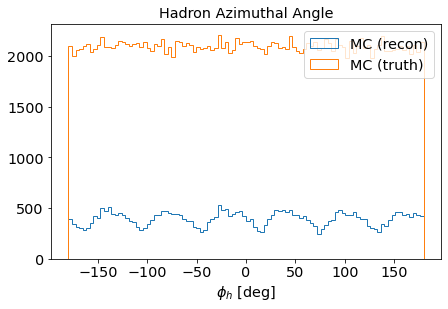

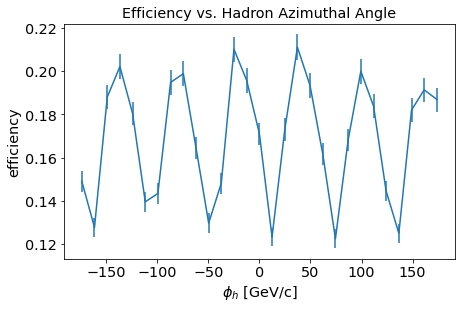

In [52]:
plt.hist(mc_hadrons.query("h_p>0").h_ph*180/np.pi,bins=100, range=(-180,180),histtype='step',label="MC (recon)")
plt.hist(mc_hadrons.query("h_truth_p>0").h_truth_ph*180/np.pi,bins=100, range=(-180,180),histtype='step',label="MC (truth)")
plt.gca().set_xlabel("$\\phi_{h}$ [deg]")
plt.gca().set_title("Hadron Azimuthal Angle")
plt.gca().legend()
plt.show()

x = []
y = []
dy = []
for bin in binspace(mc_hadrons.query("h_truth_p>0"), "h_truth_ph*180/3.14159", -180,180,30):
    n_recon = len(bin.query("h_p>0"))
    n_gen = len(bin)
    x.append(np.mean(bin.h_truth_ph*180/3.14159))
    if n_gen != 0:
        y.append(n_recon/n_gen)
    else :
        y.append(0)
    dy.append(n_recon/n_gen*np.sqrt(1/max(n_recon,1)+1/max(n_gen,1)))
plt.errorbar(x,y,dy)
    
plt.gca().set_xlabel("$\\phi_{h}$ [GeV/c]")
plt.gca().set_ylabel("efficiency")
plt.gca().set_title("Efficiency vs. Hadron Azimuthal Angle")
plt.show()